In [1]:
from pynwb import NWBHDF5IO
import numpy as np
import pygfx as gfx
from wgpu.gui.auto import WgpuCanvas

RFBOutputContext()

JupyterWgpuCanvas()
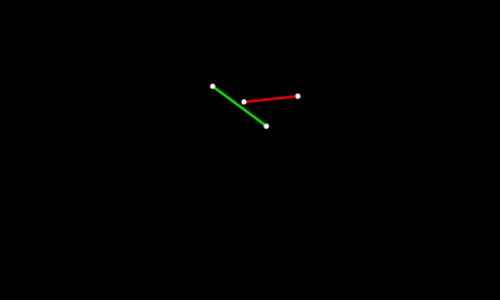

In [2]:
canvas = WgpuCanvas()
renderer = gfx.WgpuRenderer(canvas)
scene = gfx.Scene()
colors = [(255, 0, 0, 1.0), (0, 255, 0, 1.0), (0, 0, 255, 1.0), (255, 255, 0, 1.0), (0, 255, 255, 1.0), (255, 0, 255, 1.0)]

with NWBHDF5IO("tests/data/nwb/labels.v002.nwb", mode="r", load_namespaces=True) as io:
    nwbfile = io.read()
    processing_module = list(nwbfile.processing.values())[0]
    pose_training = processing_module.data_interfaces["PoseTraining"]
    training_frames = list(pose_training.training_frames.training_frames.values())
    frame_index = input(f"Enter the index of the frame you want to visualize (range: {0} - {len(training_frames)-1}): ")
    skeleton_instances = training_frames[int(frame_index)].skeleton_instances
    skeleton_instances_list = list(skeleton_instances.skeleton_instances.values())

    for i, instance in enumerate(skeleton_instances_list):
        node_locations = np.array(instance.node_locations)
        node_locations *= 0.003
        node_locations -= 0.4
        node_locations = np.hstack((node_locations, np.ones((node_locations.shape[0], 1)))).astype(np.float32)
        points = gfx.Points(
            gfx.Geometry(positions=node_locations),
            gfx.PointsMaterial(size=4, color=(255, 255, 255, 1.0)),
        )
        scene.add(points)

        for node1, node2 in instance.skeleton.edges:
            edge = node_locations[[node1, node2]]
            scene.add(gfx.Line(
                gfx.Geometry(positions=edge),
                gfx.LineMaterial(color=colors[i], thickness=1.0),
            ))

scene.add(gfx.Background(material=gfx.BackgroundMaterial("#000000")))
camera = gfx.OrthographicCamera(1, 1)
canvas.request_draw(lambda: renderer.render(scene, camera))
canvas

In [6]:
canvas = WgpuCanvas()
renderer = gfx.WgpuRenderer(canvas)
scene = gfx.Scene()
colors = [(255, 0, 0, 1.0), (0, 255, 0, 1.0), (0, 0, 255, 1.0), (255, 255, 0, 1.0), (0, 255, 255, 1.0), (255, 0, 255, 1.0), (150, 125, 0, 1.0), (0, 150, 125, 1.0), (125, 0, 150, 1.0), (150, 150, 0, 1.0), (0, 150, 150, 1.0), (150, 0, 150, 1.0)]


with NWBHDF5IO("tests/data/new_nwb/centered_pair_predictions.nwb", mode="r", load_namespaces=True) as io:
    nwbfile = io.read()
    processing_module = list(nwbfile.processing.values())[0]
    data_interfaces = processing_module.data_interfaces
    pose_estimation_list = (list(data_interfaces.values()))
    for pose_estimation in pose_estimation_list:
        pose_estimation_series_list = list(pose_estimation.pose_estimation_series.values())
        

# scene.add(gfx.Background(material=gfx.BackgroundMaterial("#000000")))
# camera = gfx.OrthographicCamera(1, 1)
# canvas.request_draw(lambda: renderer.render(scene, camera))
# canvas

RFBOutputContext()

track000 abc.PoseEstimation at 0x5794473136
Fields:
  description: Estimated positions of Skeleton-count(0) in video /Users/keya/salk/sleap-io/tests/data/videos/centered_pair_low_quality.mp4 using SLEAP.
  dimensions: <HDF5 dataset "dimensions": shape (1, 2), type "<u8">
  edges: <HDF5 dataset "edges": shape (23, 2), type "<u8">
  labeled_videos: <StrDataset for HDF5 dataset "labeled_videos": shape (1,), type "|O">
  nodes: <StrDataset for HDF5 dataset "nodes": shape (24,), type "|O">
  original_videos: <StrDataset for HDF5 dataset "original_videos": shape (1,), type "|O">
  pose_estimation_series: {
    abdomen <class 'abc.PoseEstimationSeries'>,
    forelegL1 <class 'abc.PoseEstimationSeries'>,
    forelegL2 <class 'abc.PoseEstimationSeries'>,
    forelegL3 <class 'abc.PoseEstimationSeries'>,
    forelegR1 <class 'abc.PoseEstimationSeries'>,
    forelegR2 <class 'abc.PoseEstimationSeries'>,
    forelegR3 <class 'abc.PoseEstimationSeries'>,
    head <class 'abc.PoseEstimationSeries'>,

In [17]:
print(data_interfaces)
pose_estimation = list(data_interfaces.values())[0]
print(pose_estimation_series_list[0].data)

{'track000': track000 abc.PoseEstimation at 0x5794473136
Fields:
  description: Estimated positions of Skeleton-count(0) in video /Users/keya/salk/sleap-io/tests/data/videos/centered_pair_low_quality.mp4 using SLEAP.
  pose_estimation_series: {
    abdomen <class 'abc.PoseEstimationSeries'>,
    forelegL1 <class 'abc.PoseEstimationSeries'>,
    forelegL2 <class 'abc.PoseEstimationSeries'>,
    forelegL3 <class 'abc.PoseEstimationSeries'>,
    forelegR1 <class 'abc.PoseEstimationSeries'>,
    forelegR2 <class 'abc.PoseEstimationSeries'>,
    forelegR3 <class 'abc.PoseEstimationSeries'>,
    head <class 'abc.PoseEstimationSeries'>,
    hindlegL1 <class 'abc.PoseEstimationSeries'>,
    hindlegL2 <class 'abc.PoseEstimationSeries'>,
    hindlegL3 <class 'abc.PoseEstimationSeries'>,
    hindlegR1 <class 'abc.PoseEstimationSeries'>,
    hindlegR2 <class 'abc.PoseEstimationSeries'>,
    hindlegR3 <class 'abc.PoseEstimationSeries'>,
    midlegL1 <class 'abc.PoseEstimationSeries'>,
    midlegL2 